**Notebook to compare the different cities**

---


**Libraries**

In [1]:
import operation as op
import os
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_style('whitegrid')

**Datasets**

In [2]:
# Companies datasets:
sanfran_companies = pd.read_csv('../data/companies_sanfrancisco.csv')
newyork_companies = pd.read_csv('../data/companies_newyork.csv')
london_companies = pd.read_csv('../data/companies_london.csv')
south_sanfran_companies = pd.read_csv('../data/companies_south_sanfrancisco.csv')

In [3]:
# Activities/categories datasets:
sanfran_activities = pd.read_csv("../data/sanfrancisco_activities.csv")
south_sanfran_activities = pd.read_csv("../data/south_sanfrancisco_activities.csv")
newyork_activities = pd.read_csv("../data/newyork_activities.csv")
london_activities = pd.read_csv("../data/london_activities.csv")

**Coordinates**

In [4]:
# Original, my company's coordinates
sanfran_coord = [37.781929, -122.404176]
south_sanfran_coord = [37.656246, -122.399735]
newyork_coord = [40.739930, -73.993049]
london_coord = [51.514165, -0.109017]

In [5]:
# Transformed for the distance function
sanfran_hav = sanfran_coord[::-1]
south_sanfran_hav = south_sanfran_coord[::-1]
newyork_hav = newyork_coord[::-1]
london_hav = london_coord[::-1]

---

# Weighted distances table by City

## Calculating distances

**Calculating the distance between my company and the gaming-tech-design companies.**

In [6]:
sanfran_companies_dist = op.addDistanceHaversine(sanfran_companies, sanfran_hav)
south_sanfran_companies_dist = op.addDistanceHaversine(south_sanfran_companies, south_sanfran_hav)
newyork_companies_dist = op.addDistanceHaversine(newyork_companies, newyork_hav)
london_companies_dist = op.addDistanceHaversine(london_companies, london_hav)

**Exporting tables for map visualization**

In [7]:
# Renaming the columns
sanfran_companies_dist = op.renameColumns(sanfran_companies_dist)
newyork_companies_dist = op.renameColumns(newyork_companies_dist)
london_companies_dist = op.renameColumns(london_companies_dist)
south_sanfran_companies_dist = op.renameColumns(south_sanfran_companies_dist)

In [8]:
# Exporting
sanfran_companies_dist.to_csv('../data/companies_sanfrancisco_map.csv', index = False)
newyork_companies_dist.to_csv('../data/companies_newyork_map.csv', index = False)
london_companies_dist.to_csv('../data/companies_london_map.csv', index = False)
south_sanfran_companies_dist.to_csv('../data/companies_south_sanfrancisco_map.csv', index = False)

## Establishing the weights

**Establishing the weights and radius (used for penalizing NaN) for each activity/category**

In [9]:
category_weight = {"airport" : 0.01,
                    "basketball" : 0.05,
                    "club" : 0.1,
                    "dog hairdresser" : 0.04,
                    "school" : 0.3,
                    "starbucks" : 0.2,
                    "vegan restaurant" : 0.1,
                    "companies nearby" : 0.2}

In [10]:
category_radius = {"airport" : 50000,
                    "basketball" : 10000,
                    "club" : 2000,
                    "dog hairdresser" : 10000,
                    "school" : 2000,
                    "starbucks" : 2000,
                    "vegan restaurant" : 2000,
                    "companies nearby" : 5000}

## Applying the functions to calculate the weighted distance for each city

- **San Francisco**

In [11]:
sanfran_concat = op.concatDataframes(sanfran_activities, sanfran_companies_dist)
sanfran_t = op.createSummaryTable(sanfran_concat, category_weight, category_radius)
sanfran_t

,query,weight,radius,counts,sum_distance,avg_distance,weighted_avg_distance
0,airport,0.01,50000.0,2,36893,18446.5,184.5
1,basketball,0.05,10000.0,4,11052,2763.0,138.2
2,club,0.10,2000.0,5,1869,373.8,37.4
3,dog hairdresser,0.04,10000.0,2,4118,2059.0,82.4
4,school,0.30,2000.0,5,2279,455.8,136.7
5,starbucks,0.20,2000.0,5,1916,383.2,76.6
6,vegan restaurant,0.10,2000.0,5,2780,556.0,55.6
7,companies nearby,0.20,5000.0,24,28282,1178.4,235.7


- **South San Francisco**

In [12]:
south_sanfran_concat = op.concatDataframes(south_sanfran_activities, south_sanfran_companies_dist)
south_sanfran_t = op.createSummaryTable(south_sanfran_concat, category_weight, category_radius)
south_sanfran_t

,query,weight,radius,counts,sum_distance,avg_distance,weighted_avg_distance
0,airport,0.01,50000.0,4.0,44084.0,11021.0,110.2
1,basketball,0.05,10000.0,NaN,NaN,10000.0,500.0
2,club,0.10,2000.0,2.0,2060.0,1030.0,103.0
3,dog hairdresser,0.04,10000.0,NaN,NaN,10000.0,400.0
4,school,0.30,2000.0,5.0,6862.0,1372.4,411.7
5,starbucks,0.20,2000.0,3.0,2265.0,755.0,151.0
6,vegan restaurant,0.10,2000.0,2.0,1709.0,854.5,85.4
7,companies nearby,0.20,5000.0,7.0,10959.0,1565.6,313.1


- **New York**

In [13]:
newyork_concat = op.concatDataframes(newyork_activities, newyork_companies_dist)
newyork_t = op.createSummaryTable(newyork_concat, category_weight, category_radius)
newyork_t

,query,weight,radius,counts,sum_distance,avg_distance,weighted_avg_distance
0,airport,0.01,50000.0,3,47988,15996.0,160.0
1,basketball,0.05,10000.0,5,20903,4180.6,209.0
2,club,0.10,2000.0,5,1339,267.8,26.8
3,dog hairdresser,0.04,10000.0,5,22480,4496.0,179.8
4,school,0.30,2000.0,5,906,181.2,54.4
5,starbucks,0.20,2000.0,5,1799,359.8,72.0
6,vegan restaurant,0.10,2000.0,5,1777,355.4,35.5
7,companies nearby,0.20,5000.0,13,25866,1989.7,397.9


- **London (GBR)**

In [14]:
london_concat = op.concatDataframes(london_activities, london_companies_dist)
london_t = op.createSummaryTable(london_concat, category_weight, category_radius)
london_t

,query,weight,radius,counts,sum_distance,avg_distance,weighted_avg_distance
0,airport,0.01,50000.0,3.0,75537.0,25179.0,251.8
1,basketball,0.05,10000.0,NaN,NaN,10000.0,500.0
2,club,0.10,2000.0,5.0,2466.0,493.2,49.3
3,dog hairdresser,0.04,10000.0,NaN,NaN,10000.0,400.0
4,school,0.30,2000.0,5.0,4578.0,915.6,274.7
5,starbucks,0.20,2000.0,5.0,2145.0,429.0,85.8
6,vegan restaurant,0.10,2000.0,5.0,2772.0,554.4,55.4
7,companies nearby,0.20,5000.0,1.0,4168.0,4168.0,833.6


# Summary table with the score of each city

**Naming the dataframes for the summary table**

In [15]:
sanfran_t.name = "San Francisco"
south_sanfran_t.name = "South San Francisco"
newyork_t.name = "New York"
london_t.name = "London"

**Calculating total score for each city:** 
- Score is expressed as % Avg distance and normalized based on the city with the minimum average distance to other things.
- Percentages over 100 indicate that on average things are +% far away from my initial coordinates (my company's location).
- The lower percentage (minimum is 100), the better.
- For instance: in London, things are +159% more distant.

In [16]:
total = op.calculateTotal(newyork_t, sanfran_t, london_t, south_sanfran_t)
total

,City,% Avg distance
0,San Francisco,100
1,New York,120
2,South San Francisco,219
3,London,259


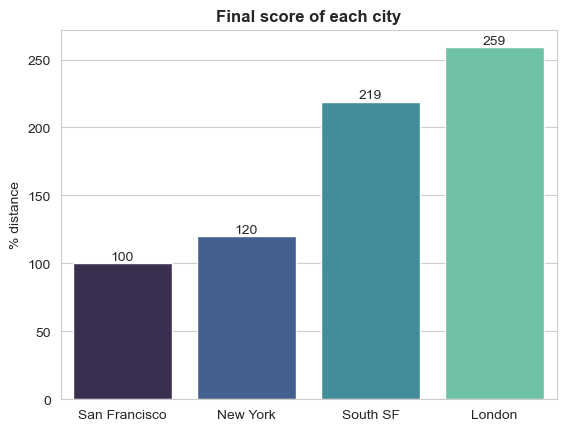

In [17]:
fig = sns.barplot(x = "City", y = "% Avg distance", data = total, palette = "mako")
fig.bar_label(fig.containers[0])
fig.set(ylabel = '% distance', xlabel = "")
fig.set_title('Final score of each city', weight = "bold")
plt.xticks(ticks = [0,1,2,3], labels = ["San Francisco", "New York", "South SF", "London"])
plt.show()

fig.figure.savefig('../images/final_score.jpg', dpi=1000, bbox_inches='tight')